Importing All the required Modules

In [1]:
import pandas as pd  # data manipulation
import os
import numpy as np   # linear algebra
import seaborn as sns 
import matplotlib.pyplot as plt # matplotlib for plotting graphs
import scipy as sp
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# %matplotlib inline renders plot inline on your page
%matplotlib inline

Loading File A and B.

We created the files by accumulating all the PSV files using the code listed below.

It takes lots of time to compile the psv file in pandas frame.

The output file of the below code as been attached in the submission file and has been used as the base for the code.

In [2]:
fileA=pd.read_csv("C:/Users/IKIGAI/Desktop/Sanket/Study Jio/Subject wise work/Q2/Machine learning/Final Project/IPYNB files/file1.csv")

In [94]:
# inp_list = []

# for each_file in os.listdir('C:/Users/IKIGAI/Desktop/Sanket/Study Jio/Subject wise work/Q2/Machine learning/Final Project/training_setA/training'):
#     inp_list.append(
#         pd.read_csv('C:/Users/IKIGAI/Desktop/Sanket/Study Jio/Subject wise work/Q2/Machine learning/Final Project/training_setA/training' + each_file, 
#                     sep = '|', 
#                     index_col = None, 
#                     header = 0)
#     )
    
# inp_df = pd.concat(inp_list, axis = 0, ignore_index = True)

In [3]:
fileB=pd.read_csv("C:/Users/IKIGAI/Desktop/Sanket/Study Jio/Subject wise work/Q2/Machine learning/Final Project/IPYNB files/file2.csv")

In [4]:
for cols in fileA.columns:
    print(cols)

Unnamed: 0
Hour
HR
O2Sat
Temp
SBP
MAP
DBP
Resp
EtCO2
BaseExcess
HCO3
FiO2
pH
PaCO2
SaO2
AST
BUN
Alkalinephos
Calcium
Chloride
Creatinine
Bilirubin_direct
Glucose
Lactate
Magnesium
Phosphate
Potassium
Bilirubin_total
TroponinI
Hct
Hgb
PTT
WBC
Fibrinogen
Platelets
Age
Gender
Unit1
Unit2
HospAdmTime
ICULOS
SepsisLabel
Patient_ID


In [5]:
fileA1=fileA.filter(['HR','O2Sat','Temp','SBP','MAP', 'DBP','Resp','Age','Gender','Bilirubin_direct','WBC','TroponinI','Creatinine','BaseExcess','Lactate','pH','Patient_ID','new_age','HospAdmTime'
,'ICULOS','SepsisLabel'])

In [6]:
fileB1=fileB.filter(['HR','O2Sat','Temp','SBP','MAP', 'DBP','Resp','Age','Gender','Bilirubin_direct','WBC','TroponinI','Creatinine','BaseExcess','Lactate','pH','Patient_ID','new_age','HospAdmTime'
,'ICULOS','SepsisLabel'])

Printing only patients with 6 hours data (sepsis label 1)

In [7]:
df = fileA1

grouped_df = df.groupby('Patient_ID')

FileA16h1LOnly = pd.DataFrame(columns=df.columns)


for name, group in grouped_df:

  if group['SepsisLabel'].sum() > 1:
  
    rows_0 = group[group['SepsisLabel'] == 0]
  
    rows_1 = group[group['SepsisLabel'] == 1].head(6)
    
    selected_rows = pd.concat([rows_0, rows_1], ignore_index=True)
  
    FileA16h1LOnly = pd.concat([FileA16h1LOnly, selected_rows], ignore_index=True)
    
# Print the new data frame
#print(new_df)

In [8]:
FileA16h1LOnly[FileA16h1LOnly['Patient_ID']==9]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Bilirubin_direct,WBC,TroponinI,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,1,0
1,117.0,99.0,NaN,116.0,97.0,81.0,20.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,2,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,8.9,NaN,NaN,-7.0,3.6,7.15,9,-0.03,3,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,3.9,NaN,NaN,-4.0,2.7,7.13,9,-0.03,4,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,NaN,NaN,NaN,-1.0,3.8,7.30,9,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,118.0,96.0,NaN,138.0,108.0,88.0,26.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,250,1
250,111.0,97.0,37.39,136.0,106.0,86.0,26.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,251,1
251,116.0,96.0,37.72,143.0,109.0,88.0,30.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,252,1
252,120.0,97.0,NaN,138.0,106.0,85.0,32.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,253,1


In [9]:
df = fileB1
grouped_df = df.groupby('Patient_ID')


FileB16h1LOnly = pd.DataFrame(columns=df.columns)


for name, group in grouped_df:

  if group['SepsisLabel'].sum() > 1:
  
    rows_0 = group[group['SepsisLabel'] == 0]
 
    rows_1 = group[group['SepsisLabel'] == 1].head(6)

    selected_rows = pd.concat([rows_0, rows_1], ignore_index=True)
  
    FileB16h1LOnly = pd.concat([FileB16h1LOnly, selected_rows], ignore_index=True)
    
# Print the new data frame
#print(new_df)

printing patients with label 0

In [10]:
import pandas as pd

df = fileA1

df_grouped = df.groupby('Patient_ID')

FileA10LOnly = df_grouped.filter(lambda x: x['SepsisLabel'].sum() < 1)

# Display the filtered data frame
#print(df_filtered)

In [11]:
FileA10LOnly[FileA10LOnly['Patient_ID']==9]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Bilirubin_direct,WBC,TroponinI,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel


In [12]:
Combining the Sepsis label 0 and label 1 patients data frame that we derieved aboveimport pandas as pd

df = fileB1

df_grouped = df.groupby('Patient_ID')

FileB10LOnly = df_grouped.filter(lambda x: x['SepsisLabel'].sum() < 1)

# Display the filtered data frame
#print(df_filtered)

Combining the Sepsis label 0 and label 1 patients data frame that we derieved above

In [13]:
Combining the Sepsis label 0 and label 1 patients data frame that we derieved aboveimport pandas as pd

df1 = FileA10LOnly

df2 = FileA16h1LOnly

fileA11 = pd.concat([df1, df2], ignore_index=True)

# Display the merged data frame
#print(df_merged)

In [14]:
fileA11[fileA11['Patient_ID']==9]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Bilirubin_direct,WBC,TroponinI,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel
685251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,1,0
685252,117.0,99.0,NaN,116.0,97.0,81.0,20.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,2,0
685253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,8.9,NaN,NaN,-7.0,3.6,7.15,9,-0.03,3,0
685254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,3.9,NaN,NaN,-4.0,2.7,7.13,9,-0.03,4,0
685255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.92,1,NaN,NaN,NaN,NaN,-1.0,3.8,7.30,9,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685500,118.0,96.0,NaN,138.0,108.0,88.0,26.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,250,1
685501,111.0,97.0,37.39,136.0,106.0,86.0,26.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,251,1
685502,116.0,96.0,37.72,143.0,109.0,88.0,30.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,252,1
685503,120.0,97.0,NaN,138.0,106.0,85.0,32.0,27.92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,-0.03,253,1


In [15]:
len(fileA1)-len(fileA11) # this is the number of records we are not considering for analysis ... all are sepsis label 1 > 6hours

6396

In [16]:
import pandas as pd

df1 = FileB10LOnly

df2 = FileB16h1LOnly

fileB11 = pd.concat([df1, df2], ignore_index=True)

# Display the merged data frame
#print(df_merged)

We will start imputation

We performed imputation with 2 methods,

The first method did not worked well, it was by imputing the values with group means of age and sepsis label.

The second method worked well, we performed backfilling for missing rows by grouping it on patient ID and the if still the data is missing then forward filling was applied. Ideally forward filling was required for very less data rows. It is giving better results

Simple logic here was that the current health condition of a person is carrying the backloag of his previous states.



In [17]:
# We will try to use 3rd technique for imputing values in the empty cells by backfilling and forward filling. Lets see if it works.

dfBandF = fileA11

#
grouped_df = dfBandF.groupby('Patient_ID')


backfill_df = grouped_df.apply(lambda x: x.bfill())

forwardfill_df = backfill_df.apply(lambda x: x.ffill())

In [18]:
dfBandFA=forwardfill_df

In [19]:

dfBandFA.isnull().sum()

HR                     0
O2Sat                  0
Temp                   0
SBP                    0
MAP                    0
DBP                   54
Resp                   0
Age                    0
Gender                 0
Bilirubin_direct    1610
WBC                    0
TroponinI            485
Creatinine             0
BaseExcess             0
Lactate              202
pH                     0
Patient_ID             0
HospAdmTime            0
ICULOS                 0
SepsisLabel            0
dtype: int64

In [20]:
dfBandFA.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Bilirubin_direct,WBC,TroponinI,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel
0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,83.14,0,NaN,5.7,NaN,0.7,24.0,NaN,7.36,1,-0.03,1,0
1,97.0,95.0,36.11,98.0,75.33,NaN,19.0,83.14,0,NaN,5.7,NaN,0.7,24.0,NaN,7.36,1,-0.03,2,0
2,89.0,99.0,36.11,122.0,86.00,NaN,22.0,83.14,0,NaN,5.7,NaN,0.7,24.0,NaN,7.36,1,-0.03,3,0
3,90.0,95.0,36.11,122.0,91.33,NaN,30.0,83.14,0,NaN,5.7,NaN,0.7,24.0,NaN,7.36,1,-0.03,4,0
4,103.0,88.5,36.11,122.0,91.33,NaN,24.5,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,5,0
5,110.0,91.0,36.11,123.0,77.00,NaN,22.0,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,6,0
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,7,0
7,106.0,90.5,37.17,93.0,76.33,NaN,29.0,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,8,0
8,104.0,95.0,37.17,133.0,88.33,NaN,26.0,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,9,0
9,102.0,91.0,37.17,134.0,87.33,NaN,30.0,83.14,0,NaN,5.7,NaN,0.7,23.0,NaN,7.40,1,-0.03,10,0


In [21]:
len(dfBandFA)

783819

Droped the null rows as we have many rows of label 0, 20 patient

In [22]:
filtered_df = fileA11New.dropna()

fileA11New = filtered_df

In [23]:
len(fileA11New)

782209

In [24]:
len(dfBandFA)-len(fileA11New)

1610

In [25]:
import numpy as np

def fe_new_age(data):
    data['new_age'] = np.where(data['Age'] >= 60, 'old',
                               np.where(data['Age'] < 10, 'infant', 'adult'))
    return data


In [26]:
sepsis_data = fe_new_age(fileA11)

In [27]:
sepsis_data_test = fe_new_age(fileB11)

Now the data is very dangoursly imbalanced with 0 labels dominating the game.

So we decided to go with upsampling.

SMOTE was used to do so.

We needed a new SepsisNClabel for segreating pateint having sepsis and not having/had sepsis so that we can use it to form clearn groups for SMOT.

In [28]:
#We needed a new SepsisNClabel for segreating pateint having sepsis and not having/had sepsis so that we can use it to form clearn groups for SMOT.#needed SepsisNClabel for segreating pateint having/had sepsis and no having/had sepsis
df = fileA11


df['SepsisNCLabel'] = df.groupby('Patient_ID')['SepsisLabel'].transform(lambda x: 1 if x.sum() > 1 else 0)

#print(df)

In [29]:

df2 = fileB11

df2['SepsisNCLabel'] = df2.groupby('Patient_ID')['SepsisLabel'].transform(lambda x: 1 if x.sum() > 1 else 0)

#print(df)

In [30]:
df[df['Patient_ID'] == 11]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Bilirubin_direct,...,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel,new_age,SepsisNCLabel
685505,81.0,100.0,NaN,NaN,NaN,NaN,12.5,65.79,1,NaN,...,NaN,0.0,2.2,7.45,11,-0.02,2,0,old,1
685506,82.0,100.0,38.00,136.5,90.0,71.0,12.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,3,0,old,1
685507,81.0,100.0,38.11,114.0,87.0,61.0,12.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,4,0,old,1
685508,82.0,100.0,NaN,114.0,79.0,62.0,12.0,65.79,1,NaN,...,1.0,NaN,NaN,NaN,11,-0.02,5,0,old,1
685509,84.0,100.0,NaN,117.0,79.0,61.0,16.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,6,0,old,1
685510,84.0,100.0,NaN,103.0,73.5,58.0,20.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,7,0,old,1
685511,85.0,100.0,38.17,123.0,72.0,66.0,18.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,8,0,old,1
685512,85.0,100.0,NaN,143.0,96.0,72.0,14.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,9,0,old,1
685513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,10,0,old,1
685514,79.0,100.0,NaN,146.0,93.0,63.0,12.0,65.79,1,NaN,...,NaN,NaN,NaN,NaN,11,-0.02,11,0,old,1


filling any missing values before foing for upsampling

In [31]:
filling any missing values before foing for upsampling# Load the data into a Pandas data frame
df = fileA11

grouped_df = df.groupby(['SepsisNCLabel', 'new_age'])

filled_df = grouped_df.apply(lambda x: x.fillna(x.mean()))

filled_df = filled_df.reset_index()

C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1533307499.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filled_df = grouped_df.apply(lambda x: x.fillna(x.mean()))


In [32]:
df2 = fileB11

grouped_df2 = df2.groupby(['SepsisNCLabel', 'new_age'])

filled_df2 = grouped_df2.apply(lambda x: x.fillna(x.mean()))

filled_df2 = filled_df2.reset_index()

C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\483888177.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filled_df2 = grouped_df2.apply(lambda x: x.fillna(x.mean()))


In [33]:
filled_df2.isnull().sum()

index               0
HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
Age                 0
Gender              0
Bilirubin_direct    0
WBC                 0
TroponinI           0
Creatinine          0
BaseExcess          0
Lactate             0
pH                  0
Patient_ID          0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
new_age             0
SepsisNCLabel       0
dtype: int64

In [34]:
filled_df.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel,new_age,SepsisNCLabel
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,1,0,old,0
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,2,0,old,0
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,3,0,old,0
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,1.383659,24.000000,2.436634,7.360000,1,-0.03,4,0,old,0
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,5,0,old,0


To perform SMOTE, it requries float/int data types. Strings are not accepted. hence creating dummies of the string columns

In [35]:
one_hot_encoded_df = pd.get_dummies(filled_df, columns=['new_age']) # so that we can perform SMOTE

In [36]:
one_hot_encoded_dfB = pd.get_dummies(filled_df2, columns=['new_age']) # so that we can perform SMOTE, it requries float/int data types. strings are not accepted

In [37]:
filled_df.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel,new_age,SepsisNCLabel
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,1,0,old,0
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,2,0,old,0
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,3,0,old,0
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,1.383659,24.000000,2.436634,7.360000,1,-0.03,4,0,old,0
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,1.383659,-0.855177,2.436634,7.378806,1,-0.03,5,0,old,0


In [38]:
NewFile=filled_df.drop(['new_age'], axis=1)

In [39]:
NewFile2=filled_df2.drop(['new_age'], axis=1)

Perfomring SMOTE on A test data set

In [40]:
Perfomring SMOTE on A test data set# import the SMOTE module
from imblearn.over_sampling import SMOTE

X = NewFile.drop('SepsisLabel', axis=1)
y = NewFile['SepsisLabel']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

A_resampled = pd.DataFrame(X_resampled, columns=X.columns)
A_resampled['SepsisLabel'] = y_resampled
A_resampled['Synthesized'] = np.where(y_resampled == 1, 1, 0)

As of now we will not perform SMOTE on B test data set

In [52]:
# # import the SMOTE module
# from imblearn.over_sampling import SMOTE

# X = NewFile2.drop('SepsisLabel', axis=1)
# y = NewFile2['SepsisLabel']

# smote = SMOTE()
# X_resampled2, y_resampled2 = smote.fit_resample(X, y)

# A_resampled2 = pd.DataFrame(X_resampled, columns=X.columns)
# A_resampled2['SepsisLabel'] = y_resampled2
# A_resampled2['Synthesized'] = np.where(y_resampled2 == 1, 1, 0)

In [41]:
A_resampled2=NewFile2 # we are keeping B test file as it is... lets see what happens

In [42]:
len(fileA)

790215

In [43]:
len(A_resampled)

1546158

In [44]:
len(A_resampled2)

757566

In [45]:
print(A_resampled2.loc[A_resampled2['SepsisNCLabel'] == 1, 'SepsisNCLabel'].sum())

63017


In [46]:
fileA.describe() #original file

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,790215.000000,790215.000000,729026.000000,695136.000000,266901.000000,670014.000000,709357.000000,409918.000000,712957.00000,0.0,...,6030.000000,51499.000000,790215.000000,790215.000000,404050.000000,404050.000000,790207.000000,790215.000000,790215.000000,790215.000000
mean,25.332445,25.332445,84.985264,97.265688,37.026737,120.962359,78.767345,59.985809,18.77346,NaN,...,292.251642,199.617841,63.016780,0.577721,0.507101,0.492899,-52.025757,27.198518,0.021685,10192.652564
std,27.954160,27.954160,16.940431,2.908794,0.780317,21.520567,15.044038,12.572771,5.39575,NaN,...,158.632042,109.244146,16.133632,0.493923,0.499950,0.499950,155.864937,28.190940,0.145654,5893.668065
min,0.000000,0.000000,20.000000,20.000000,20.900000,22.000000,20.000000,20.000000,1.00000,NaN,...,34.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000,1.000000
25%,9.000000,9.000000,73.000000,96.000000,36.560000,105.000000,68.000000,51.000000,15.00000,NaN,...,184.000000,127.000000,52.740000,0.000000,0.000000,0.000000,-38.090000,11.000000,0.000000,5074.000000
50%,20.000000,20.000000,84.000000,98.000000,37.060000,118.500000,77.000000,58.500000,18.00000,NaN,...,250.000000,181.000000,65.250000,1.000000,1.000000,0.000000,-2.600000,21.000000,0.000000,10174.000000
75%,33.000000,33.000000,96.000000,99.500000,37.550000,134.000000,87.330000,67.000000,22.00000,NaN,...,356.750000,247.000000,75.890000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000,15284.000000
max,335.000000,335.000000,280.000000,100.000000,42.220000,281.000000,300.000000,298.000000,69.00000,NaN,...,1760.000000,1783.000000,89.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000,20643.000000


In [47]:
A_resampled.describe() # Upsampled file

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,Creatinine,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized
count,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,...,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1.546158e+06,1546158.0,1546158.0
mean,5.606411e+05,8.740073e+01,9.724246e+01,3.709086e+01,1.211671e+02,7.886489e+01,6.062708e+01,1.970418e+01,6.293308e+01,5.903478e-01,...,1.490006e+00,-4.641887e-01,2.456014e+00,7.381861e+00,1.023109e+04,-6.529259e+01,3.974009e+01,5.568040e-01,0.5,0.5
std,2.358205e+05,1.690488e+01,2.619179e+00,4.825464e-01,1.951188e+01,1.398199e+01,9.537812e+00,5.387932e+00,1.607672e+01,4.917697e-01,...,3.921071e-01,1.521264e+00,4.699813e-01,2.649510e-02,5.920224e+03,1.824492e+02,4.687719e+01,4.967630e-01,0.5,0.5
min,0.000000e+00,2.000000e+01,2.000000e+01,2.090000e+01,2.200000e+01,2.000000e+01,2.000000e+01,1.000000e+00,1.811000e+01,0.000000e+00,...,1.000000e-01,-3.200000e+01,2.000000e-01,6.620000e+00,1.000000e+00,-3.710660e+03,1.000000e+00,0.000000e+00,0.0,0.0
25%,3.865392e+05,7.600000e+01,9.600000e+01,3.696713e+01,1.080000e+02,6.971159e+01,5.700374e+01,1.600000e+01,5.251000e+01,0.000000e+00,...,1.383659e+00,-8.551767e-01,2.436634e+00,7.378806e+00,5.044000e+03,-4.625000e+01,1.100000e+01,0.000000e+00,0.0,0.0
50%,6.958890e+05,8.626387e+01,9.746787e+01,3.705012e+01,1.207913e+02,7.782006e+01,5.840873e+01,1.900000e+01,6.521000e+01,1.000000e+00,...,1.512397e+00,-2.660124e-01,2.436634e+00,7.379903e+00,1.027900e+04,-1.600000e+00,2.400000e+01,1.000000e+00,0.5,0.5
75%,7.394350e+05,9.793876e+01,9.900000e+01,3.726884e+01,1.310000e+02,8.600000e+01,6.531794e+01,2.243141e+01,7.587000e+01,1.000000e+00,...,1.615733e+00,-2.311264e-01,2.456061e+00,7.389054e+00,1.526400e+04,-2.000000e-02,4.600000e+01,1.000000e+00,1.0,1.0
max,7.838180e+05,2.800000e+02,1.000000e+02,4.222000e+01,2.810000e+02,3.000000e+02,2.980000e+02,6.900000e+01,8.900000e+01,1.000000e+00,...,4.660000e+01,1.000000e+02,3.100000e+01,7.930000e+00,2.064300e+04,2.399000e+01,3.360000e+02,1.000000e+00,1.0,1.0


From here we will start to do feature engineering.

Below parameters are something which we will be considering for predicting sepsis. This information has been picked from the link shared in the information ppt.

Temperature: A high fever or low body temperature can be a sign of infection.

Heart rate: A rapid heart rate may be present in sepsis.

Respiratory rate: Rapid breathing may be a sign of sepsis.

White blood cell count: A high white blood cell count may indicate the presence of infection or inflammation.

Oxygen saturation: Low oxygen saturation may indicate that the body is not getting enough oxygen, which can be a sign of sepsis.

Lactate levels: Elevated lactate levels can indicate that the body is not getting enough oxygen, which can be a sign of sepsis.

pH: Abnormal pH levels (either too high or too low) may indicate the presence of sepsis.

Base excess: Abnormal base excess levels may indicate the presence of sepsis.

Creatinine: Elevated creatinine levels may indicate kidney dysfunction, which can be a complication of sepsis.

Bilirubin: Elevated bilirubin levels may indicate liver dysfunction, which can be a complication of sepsis.

Troponin: Elevated troponin levels may indicate damage to the heart, which can be a complication of sepsis.

It is important to note that these parameters are only a few of the many that may be used to help diagnose sepsis, and they are not always present in all cases of sepsis. A healthcare provider will consider a range of clinical and laboratory findings in order to diagnose sepsis and determine the best course of treatment.


1st is for Heart rate, classification is for "Normal" Vs "Abnormal" values

In [48]:
1st is for Heart rate, classification is for "Normal" Vs "Abnormal" valuesdef HrNew(data):
    conditions = [(data['HR'] >= 70) & (data['HR'] < 110 ) & (data['Age'] < 10),
                  (data['HR'] > 60) & (data['HR'] < 100) & (data['Age'] >= 10),
                  ((data['HR'] < 70) | (data['HR'] >= 110)) & (data['Age'] < 10),
                  (data['HR'] >= 100) & (data['Age'] >= 10)]
    choices = ['normal', 'normal', 'abnormal', 'abnormal']
    data['new_hr'] = np.select(conditions, choices, default='Missing')
    return data

In [49]:
A_resampled=HrNew(A_resampled)

In [50]:
A_resampled2=HrNew(A_resampled2)

In [51]:
A_resampled.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized,new_hr
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,-0.855177,2.436634,7.378806,1,-0.03,1,0,0,0,normal
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,-0.855177,2.436634,7.378806,1,-0.03,2,0,0,0,normal
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,-0.855177,2.436634,7.378806,1,-0.03,3,0,0,0,normal
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,24.000000,2.436634,7.360000,1,-0.03,4,0,0,0,normal
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,-0.855177,2.436634,7.378806,1,-0.03,5,0,0,0,abnormal


Feature engineering for Temperature of a person

Categories are Normal and Abnormal

In [52]:
Feature engineering for Temperature of a person

Categories are Normal and Abnormaldef TempNew(data):
    condition = [(data['Temp'] >= 36) & (data['Temp'] < 38), (data['Temp'] < 36) | (data['Temp'] >= 38)]
    choices=['normal','abnormal']
    data['new_temp']= np.select(condition, choices, default='Missing')
    return data

In [53]:
A_resampled=TempNew(A_resampled)

In [54]:
A_resampled2=TempNew(A_resampled2)

In [55]:
A_resampled2.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,BaseExcess,Lactate,pH,Patient_ID,HospAdmTime,ICULOS,SepsisLabel,SepsisNCLabel,new_hr,new_temp
0,0,82.130521,97.018251,36.89833,127.554153,84.915249,63.836052,18.697546,73,1,...,-2.246684,2.872912,7.371719,100001,-214.64,1,0,0,normal,normal
1,1,93.000000,92.500000,36.89833,110.000000,76.000000,56.000000,22.000000,73,1,...,-2.246684,2.872912,7.371719,100001,-214.64,2,0,0,normal,normal
2,2,91.000000,96.000000,36.89833,108.000000,84.500000,72.000000,23.500000,73,1,...,-2.246684,2.872912,7.371719,100001,-214.64,3,0,0,normal,normal
3,3,93.000000,98.000000,36.89833,123.000000,87.000000,61.000000,21.000000,73,1,...,-2.246684,2.872912,7.371719,100001,-214.64,4,0,0,normal,normal
4,4,93.000000,95.000000,36.89833,110.000000,81.000000,70.000000,20.000000,73,1,...,-2.246684,2.872912,7.371719,100001,-214.64,5,0,0,normal,normal


BpNew with manual labels did not work, not all conditions were getting satisfied. So I went for Kmeans clustering. 4 clusteres were made for low, normal, elevated and high. It worked prety well

In [56]:
# def BpNew(data):
#     conditions = [(data['SBP'] < 90) & (data['DBP'] < 60),
#                   (data['SBP'] >= 90) & (data['SBP'] <= 120) & (data['DBP'] >= 60) & (data['DBP'] <= 80),
#                   (data['SBP'] >= 120) & (data['SBP'] <= 140) & (data['DBP'] >= 80) & (data['DBP'] <= 90),
#                   (data['SBP'] > 140 ) & (data['DBP'] > 90 ),
#                   (data['SBP'].isnull()) | (data['DBP'].isnull())]
#     choices = ['low', 'normal', 'elevated', 'high', 'Missing']
#     data['new_bp'] = np.select(conditions, choices)
#     return data

In [57]:
from sklearn.cluster import KMeans

df = A_resampled

X = df[['SBP', 'DBP']]

kmeans = KMeans(n_clusters=4)

kmeans.fit(X)

y_pred = kmeans.predict(X)

label_map = {0: 'low', 1: 'normal', 2: 'elevated', 3: 'high'}
y_pred = [label_map[label] for label in y_pred]

df['BP_cluster'] = y_pred

In [58]:
from sklearn.cluster import KMeans

df2 = A_resampled2

X = df2[['SBP', 'DBP']]

kmeans = KMeans(n_clusters=4)

kmeans.fit(X)

y_pred2 = kmeans.predict(X)

label_map = {0: 'low', 1: 'normal', 2: 'elevated', 3: 'high'}
y_pred2 = [label_map[label] for label in y_pred2]

df2['BP_cluster'] = y_pred2

In [59]:
A_resampled.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,pH,Patient_ID,HospAdmTime,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized,new_hr,new_temp,BP_cluster
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,7.378806,1,-0.03,1,0,0,0,normal,normal,high
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,7.378806,1,-0.03,2,0,0,0,normal,normal,low
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,7.378806,1,-0.03,3,0,0,0,normal,normal,high
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,7.360000,1,-0.03,4,0,0,0,normal,normal,high
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,7.378806,1,-0.03,5,0,0,0,abnormal,normal,high


Feature engineering for O2 Saturation of a person

Categories are Normal and Abnormal

In [60]:
Categories are Normal and Abnormaldef NewO2sat(data):
    conditions=[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), (data['O2Sat'] < 95) & (data['O2Sat'] >= 0)]
    choices=['normal','abnormal']
    data['new_o2sat']= np.select(conditions, choices, default='missing')
    
    return data

In [61]:
A_resampled=NewO2sat(A_resampled)

In [62]:
A_resampled2=NewO2sat(A_resampled2)

In [63]:
A_resampled.tail()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,Patient_ID,HospAdmTime,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized,new_hr,new_temp,BP_cluster,new_o2sat
1546153,687301,79.533942,98.503771,37.268840,162.481143,95.969829,67.977372,21.015085,56.99,1,...,373,-0.02,143,1,1,1,normal,normal,normal,normal
1546154,723969,104.107273,98.595151,37.050119,123.252693,72.238791,58.408733,12.809698,69.03,0,...,8399,-71.31,50,1,1,1,abnormal,normal,high,normal
1546155,760056,52.435892,100.000000,35.605224,96.472757,68.000000,54.000000,15.000000,75.20,0,...,15892,-0.05,13,1,1,1,Missing,abnormal,low,missing
1546156,754404,86.661970,100.000000,37.268840,187.323940,125.720889,65.892365,19.594680,48.80,0,...,14642,-0.04,13,1,1,1,normal,normal,normal,missing
1546157,731395,77.847280,97.000000,36.821253,135.596244,85.298246,58.408733,25.916322,78.50,1,...,9658,-0.02,41,1,1,1,normal,normal,elevated,normal


Feature engineering for Respiratory data of a person.

Categories are Normal and Abnormal.

This is based on the age as well.

In [64]:
This is based on the age as well.def NewResp(data):
    conditions = [(data['Resp'].between(30, 60, inclusive=True)) & (data['Age'] < 1),
                  (data['Resp'].between(24, 40, inclusive=True)) & (data['Age'].between(1, 3, inclusive=True)),
                  (data['Resp'].between(22, 34, inclusive=True)) & (data['Age'].between(3, 6, inclusive=True)),
                  (data['Resp'].between(18, 30, inclusive=True)) & (data['Age'].between(6, 12, inclusive=True)),
                  (data['Resp'].between(12, 16, inclusive=True)) & (data['Age'].between(12, 18, inclusive=True)),
                  (data['Resp'].between(12, 20, inclusive=True)) & (data['Age'] > 18)]
    choices = ['normal'] * len(conditions)
    data['new_resp'] = np.select(conditions, choices, default='abnormal')
    return data

In [65]:
A_resampled=NewResp(A_resampled)

C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  conditions = [(data['Resp'].between(30, 60, inclusive=True)) & (data['Age'] < 1),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(24, 40, inclusive=True)) & (data['Age'].between(1, 3, inclusive=True)),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(22, 34, inclusive=True)) & (data['Age'].between(3, 6, inclusive=True)),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(

In [66]:
A_resampled2=NewResp(A_resampled2)

C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  conditions = [(data['Resp'].between(30, 60, inclusive=True)) & (data['Age'] < 1),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(24, 40, inclusive=True)) & (data['Age'].between(1, 3, inclusive=True)),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(22, 34, inclusive=True)) & (data['Age'].between(3, 6, inclusive=True)),
C:\Users\IKIGAI\AppData\Local\Temp\ipykernel_12552\1121154771.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data['Resp'].between(

In [67]:
A_resampled.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,HospAdmTime,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized,new_hr,new_temp,BP_cluster,new_o2sat,new_resp
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,-0.03,1,0,0,0,normal,normal,high,normal,normal
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,-0.03,2,0,0,0,normal,normal,low,normal,normal
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,-0.03,3,0,0,0,normal,normal,high,normal,abnormal
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,-0.03,4,0,0,0,normal,normal,high,normal,abnormal
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,-0.03,5,0,0,0,abnormal,normal,high,abnormal,abnormal


Feature engineering for Mean Artiliry pressure of a person

Categories are Normal and Abnormal

In [68]:
Categories are Normal and Abnormaldef NewMap(data):
    conditions=[(data['MAP'] >= 70) & (data['MAP'] < 100),
    (data['MAP'] < 70) | (data['MAP'] >= 100)]
    Choices=['normal','abnormal']
    data['new_map']= np.select(conditions,Choices, default='Missing')
    return data

In [69]:
A_resampled=NewMap(A_resampled)

In [70]:
A_resampled2=NewMap(A_resampled2)

In [71]:
A_resampled.head(10)

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,ICULOS,SepsisNCLabel,SepsisLabel,Synthesized,new_hr,new_temp,BP_cluster,new_o2sat,new_resp,new_map
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,1,0,0,0,normal,normal,high,normal,normal,normal
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,2,0,0,0,normal,normal,low,normal,normal,normal
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,3,0,0,0,normal,normal,high,normal,abnormal,normal
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,4,0,0,0,normal,normal,high,normal,abnormal,normal
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,5,0,0,0,abnormal,normal,high,abnormal,abnormal,normal
5,5,110.000000,91.000000,36.96713,120.679542,76.645696,57.003743,22.000000,83.14,0,...,6,0,0,0,abnormal,normal,high,abnormal,abnormal,normal
6,6,108.000000,92.000000,36.11000,123.000000,77.000000,57.003743,29.000000,83.14,0,...,7,0,0,0,abnormal,normal,high,abnormal,abnormal,normal
7,7,106.000000,90.500000,36.96713,93.000000,76.330000,57.003743,29.000000,83.14,0,...,8,0,0,0,abnormal,normal,low,abnormal,abnormal,normal
8,8,104.000000,95.000000,36.96713,133.000000,88.330000,57.003743,26.000000,83.14,0,...,9,0,0,0,abnormal,normal,elevated,normal,abnormal,normal
9,9,102.000000,91.000000,36.96713,134.000000,87.330000,57.003743,30.000000,83.14,0,...,10,0,0,0,abnormal,normal,elevated,abnormal,abnormal,normal


Feature engineering for Age of a person.

Categories are old, adult and infant.

In [73]:
Categories are old, adult and infant.def NewAge(data):
    Conditions=(data['Age'] >= 60, (data['Age'] < 10))
    Choices=['old','infant']
    data['NewAge']=np.select(Conditions,Choices,default='Adult')
    return data

In [74]:
A_resampled=NewAge(A_resampled)

In [75]:
A_resampled2=NewAge(A_resampled2)

In [76]:
A_resampled.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,SepsisNCLabel,SepsisLabel,Synthesized,new_hr,new_temp,BP_cluster,new_o2sat,new_resp,new_map,NewAge
0,0,82.516093,97.161946,36.96713,120.679542,76.645696,57.003743,18.714171,83.14,0,...,0,0,0,normal,normal,high,normal,normal,normal,old
1,1,97.000000,95.000000,36.96713,98.000000,75.330000,57.003743,19.000000,83.14,0,...,0,0,0,normal,normal,low,normal,normal,normal,old
2,2,89.000000,99.000000,36.96713,122.000000,86.000000,57.003743,22.000000,83.14,0,...,0,0,0,normal,normal,high,normal,abnormal,normal,old
3,3,90.000000,95.000000,36.96713,120.679542,76.645696,57.003743,30.000000,83.14,0,...,0,0,0,normal,normal,high,normal,abnormal,normal,old
4,4,103.000000,88.500000,36.96713,122.000000,91.330000,57.003743,24.500000,83.14,0,...,0,0,0,abnormal,normal,high,abnormal,abnormal,normal,old


In [77]:
for cols in A_resampled.columns:
    print(cols)

index
HR
O2Sat
Temp
SBP
MAP
DBP
Resp
Age
Gender
Bilirubin_direct
WBC
TroponinI
Creatinine
BaseExcess
Lactate
pH
Patient_ID
HospAdmTime
ICULOS
SepsisNCLabel
SepsisLabel
Synthesized
new_hr
new_temp
BP_cluster
new_o2sat
new_resp
new_map
NewAge


In [78]:
A_resampled2.head()

,index,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,...,ICULOS,SepsisLabel,SepsisNCLabel,new_hr,new_temp,BP_cluster,new_o2sat,new_resp,new_map,NewAge
0,0,82.130521,97.018251,36.89833,127.554153,84.915249,63.836052,18.697546,73,1,...,1,0,0,normal,normal,high,normal,normal,normal,old
1,1,93.000000,92.500000,36.89833,110.000000,76.000000,56.000000,22.000000,73,1,...,2,0,0,normal,normal,low,abnormal,abnormal,normal,old
2,2,91.000000,96.000000,36.89833,108.000000,84.500000,72.000000,23.500000,73,1,...,3,0,0,normal,normal,low,normal,abnormal,normal,old
3,3,93.000000,98.000000,36.89833,123.000000,87.000000,61.000000,21.000000,73,1,...,4,0,0,normal,normal,high,normal,abnormal,normal,old
4,4,93.000000,95.000000,36.89833,110.000000,81.000000,70.000000,20.000000,73,1,...,5,0,0,normal,normal,high,normal,normal,normal,old


Made a new df for key things which we thought are important.

Played several times with many combinations.

Finally found the best one.

In [85]:
LEData=A_resampled.filter(['Gender','pH','ICULOS', 'Gender', 'SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])

#LEData=A_resampled.filter(['Gender','pH','Patient_ID','ICULOS','HospAdmTime','SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])
#LEData=A_resampled.filter(['SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])

In [99]:
LEDataB=A_resampled2.filter(['Gender','pH','ICULOS', 'Gender', 'SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])

#LEDataB=A_resampled.filter(['Gender','pH','Patient_ID','ICULOS','HospAdmTime','SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])
#LEDataB=A_resampled2.filter(['SepsisLabel','new_hr','new_temp','BP_cluster','new_o2sat','new_resp','new_map','NewAge'])

In [87]:
    LEDataAH = pd.get_dummies(LEData)

In [100]:
LEDataBH = pd.get_dummies(LEDataB)

In [89]:
LEData.head()

,Gender,pH,ICULOS,Gender,SepsisLabel,new_hr,new_temp,BP_cluster,new_o2sat,new_resp,new_map,NewAge
0,0,7.378806,1,0,0,normal,normal,high,normal,normal,normal,old
1,0,7.378806,2,0,0,normal,normal,low,normal,normal,normal,old
2,0,7.378806,3,0,0,normal,normal,high,normal,abnormal,normal,old
3,0,7.360000,4,0,0,normal,normal,high,normal,abnormal,normal,old
4,0,7.378806,5,0,0,abnormal,normal,high,abnormal,abnormal,normal,old


In [90]:
LEDataBH.head()

,Gender,pH,ICULOS,Gender,SepsisLabel,new_hr_Missing,new_hr_abnormal,new_hr_normal,new_temp_abnormal,new_temp_normal,...,BP_cluster_normal,new_o2sat_abnormal,new_o2sat_missing,new_o2sat_normal,new_resp_abnormal,new_resp_normal,new_map_abnormal,new_map_normal,NewAge_Adult,NewAge_old
0,1,7.371719,1,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,1
1,1,7.371719,2,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
2,1,7.371719,3,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
3,1,7.371719,4,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
4,1,7.371719,5,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,1


creating models

Went with Random forest first, the results were very bad in the begining. the recall score has segnificantly improved.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = LEDataAH

X = data.drop("SepsisLabel", axis=1)
y = data["SepsisLabel"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

data_2 = LEDataBH

X_2 = data_2.drop("SepsisLabel", axis=1)
y_2 = data_2["SepsisLabel"]
y_pred_2 = model.predict(X_2)
print(confusion_matrix(y_2, y_pred_2))
print(classification_report(y_2, y_pred_2))

[[145391   9180]
 [  1759 152902]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    154571
           1       0.94      0.99      0.97    154661

    accuracy                           0.96    309232
   macro avg       0.97      0.96      0.96    309232
weighted avg       0.97      0.96      0.96    309232

[[363195 387565]
 [  1865   4941]]
              precision    recall  f1-score   support

           0       0.99      0.48      0.65    750760
           1       0.01      0.73      0.02      6806

    accuracy                           0.49    757566
   macro avg       0.50      0.60      0.34    757566
weighted avg       0.99      0.49      0.65    757566



Tried Cross Validation step with Random forest to check of the results improve, but no such big improvement

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

data = LEDataAH

X = data.drop("SepsisLabel", axis=1)
y = data["SepsisLabel"]

model = RandomForestClassifier(n_estimators=100, random_state=123)

y_pred = cross_val_predict(model, X, y, cv=5)

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

data_2 = LEDataBH
X_2 = data_2.drop("SepsisLabel", axis=1)
y_2 = data_2["SepsisLabel"]
y_pred_2 = cross_val_predict(model, X_2, y_2, cv=5)

print(confusion_matrix(y_2, y_pred_2))
print(classification_report(y_2, y_pred_2))

[[688932  84147]
 [  9060 764019]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    773079
           1       0.90      0.99      0.94    773079

    accuracy                           0.94   1546158
   macro avg       0.94      0.94      0.94   1546158
weighted avg       0.94      0.94      0.94   1546158

[[696898  53862]
 [  5271   1535]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    750760
           1       0.03      0.23      0.05      6806

    accuracy                           0.92    757566
   macro avg       0.51      0.58      0.50    757566
weighted avg       0.98      0.92      0.95    757566



We ran SVM, it gave an good precision and f1 score of 60%, but for submission transfered the code here in new notebook and cannot now run it again for 11 hours.

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix

# df = LEDataAH

# X = df.drop('SepsisLabel', axis=1)
# y = df['SepsisLabel']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = SVC()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))

# print(confusion_matrix(y_test, y_pred))

Logistics regression was the simplest and gave good values for confussion and classification.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df =LEDataAH

df = df.dropna()
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

new_df = LEDataBH
new_df = new_df.dropna()
new_X = new_df.drop('SepsisLabel', axis=1)
new_X = scaler.transform(new_X)
import seaborn as sns

corr = new_df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

from sklearn.metrics import classification_report
print(classification_report(new_df['SepsisLabel'], (predictions > 0.5)))

Accuracy: 0.6462882237284627
[[73193 80959]
 [73915 81165]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.49    154152
           1       0.50      0.52      0.51    155080

    accuracy                           0.50    309232
   macro avg       0.50      0.50      0.50    309232
weighted avg       0.50      0.50      0.50    309232

[[555952 217127]
 [328865 444214]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67    773079
           1       0.67      0.57      0.62    773079

    accuracy                           0.65   1546158
   macro avg       0.65      0.65      0.65   1546158
weighted avg       0.65      0.65      0.65   1546158



In [114]:
!pip install xgboost

     --------------------------------------- 89.1/89.1 MB 28.4 MB/s eta 0:00:00


Results from XG boost were decent if we compare the precision, recall and f1 score with other models

Accuracy: 0.9489186112692088
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    773079
           1       0.91      0.99      0.95    773079

    accuracy                           0.95   1546158
   macro avg       0.95      0.95      0.95   1546158
weighted avg       0.95      0.95      0.95   1546158



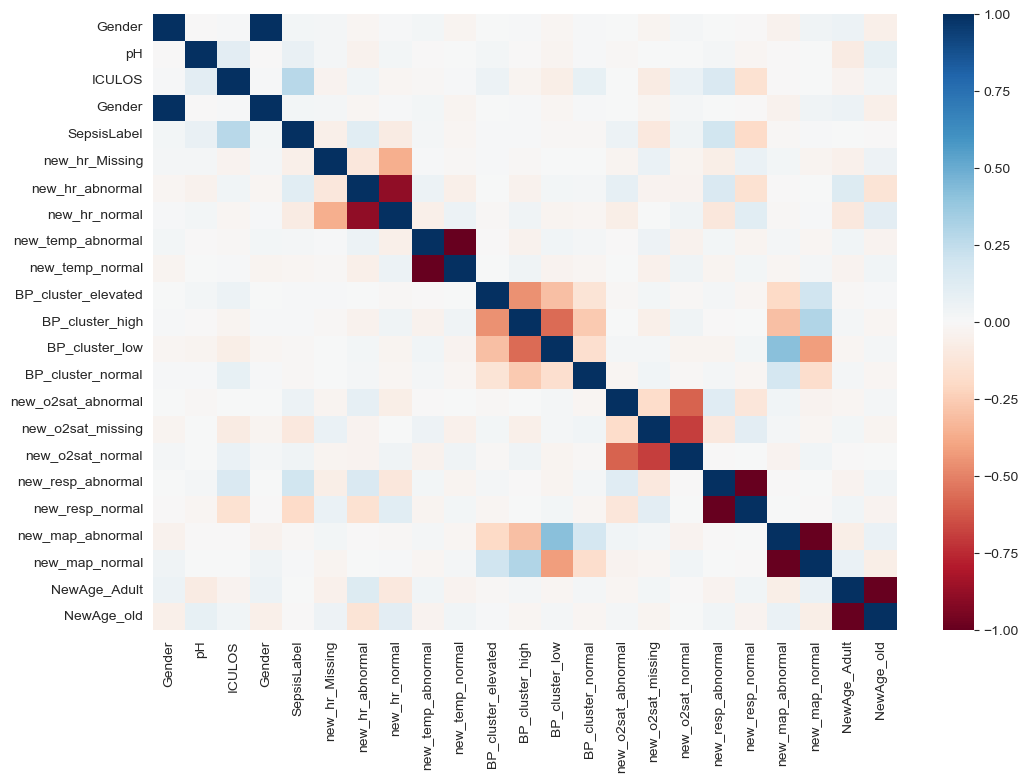

In [104]:
import xgboost as xgb

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

df = LEDataAH

df = df.dropna()
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'objective': 'binary:logistic', 'random_state': 42}
model = xgb.train(params, dtrain, num_boost_round=100)

predictions = model.predict(dtest)
accuracy = (predictions > 0.5) == y_test
print('Accuracy:', accuracy.mean())

# Predict sepsis on a new data frame
new_df = LEDataBH
new_df = new_df.dropna()
new_X = new_df.drop('SepsisLabel', axis=1)
new_X = scaler.transform(new_X)
dnew = xgb.DMatrix(new_X)
predictions = model.predict(dnew)
corr = new_df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

from sklearn.metrics import classification_report
print(classification_report(new_df['SepsisLabel'], (predictions > 0.5)))